## BCB_546X_Python_Assignment
#### by Zainab Riaz

### Import modules required to define functions

In [1]:
from Bio import SeqIO
from Bio import Seq
from Bio.Data import CodonTable
import pandas as pd
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils import GC
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
##plots inline command for jupyter 

### Functions 

In [2]:
### 1
### The following function is defined to accept Fasta format files and returns a dictionary with species name as the key and sequences parsed as generic SingleLetterAlphabet() as values 

def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

In [3]:
### 2
### The translate function uses the translation table for Vertebrate Mitochondrial DNA
### If the nucleotide string length is divisible by 3 they form codons that match amino acids from the translation table
### If a stop codon is read the amino acid string is returned 
### Nuecleotide strings are translated into amino acid strings and the amino acid strings are returned 
### Citation: https://www.geeksforgeeks.org/dna-protein-python-3/

def translate_function(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string =""
    if len(seq)%3 == 0:
        for i in range(0, len(string_nucleotides), 3):
            codon = seq[i:i + 3]
    if codon in ["AGA", "AGG", "TAA", "TAG"]:
            return aa_seq_string
    aa_seq_string+= mito_table[codon]
    return aa_seq_string

In [4]:
### 3
### Fucntion defines translate code from biopyhton library
### Translates nucleotide string into amino acid string, using the Vertebrate Mitochondrial DNA translation table. On reaching a stop codon, amino acid string is returned
### Citation: https://biopython.readthedocs.io/en/latest/Tutorial/chapter_seq_objects.html

def biopython_translate(string_nucleotides): 
    aminoacid_seq = ""
    aminoacid_seq=Seq.translate(string_nucleotides, table=2, to_stop=True) 
    return aminoacid_seq          

In [5]:
### 4
### Function to calculate molecular weight of amino acid sequences
### ProteinAnalysis() checks if the input amino acid sequence is an amino acid string
### Function returns molecular weight of the string as a float
### Citation: https://biopython.org/wiki/ProtParam

def compute_molecular_weight(aa_seq):
    true_aa_string= ProteinAnalysis(aa_seq)
    return true_aa_string.molecular_weight()    

In [6]:
### 5
### GC content analysis function
### Uses GC() function from the biopython library
### Citation: https://biopython.readthedocs.io/en/latest/Tutorial/chapter_seq_objects.html#nucleotide-sequences-and-reverse-complements

def gc_analysis(nucleotide_seq):
    return GC(nucleotide_seq)

In [7]:
### Bonus function to calculate the isoelectric point of a protein
### ProteinAnalysis() checks if the input amino acid sequence is an amino acid string
### Function returns IsoelectricPoint of the string as a float
### Citation: https://biopython.org/wiki/ProtParam

def get_isoelectric_point(aa_seq):
    true_aa_string= ProteinAnalysis(aa_seq)
    return true_aa_string.isoelectric_point() 

### Main

In [8]:
### Accept sequences from bears_cytb fasta file and add them to a dictionary
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 
### Data frame that only contains data for body mass
bears_df = pd.read_csv("bears_mass.csv") 
### Read the bears dataframe file to a species list
species_list = list(bears_df.species)

In [9]:
### 6
### Create a copy of the bears dataframe to add columns
### For loops through the copied data frame to initialize a new column entry "NaN" in each row 
### Loops for molecular weight, GC content and isoelectric point (bonus) columns
### Check column addition using head
### Citation: https://stackoverflow.com/questions/39050539/adding-multiple-columns-to-pandas-simultaneously

bears_df_cols = bears_df.copy()
for index, row in bears_df_cols.iterrows():
    bears_df_cols['molecular weight']= "NaN"
for index, row in bears_df_cols.iterrows():
    bears_df_cols['GC Content']= "NaN"
for index, row in bears_df_cols.iterrows():
    bears_df_cols['Isoelectric Point']= "NaN"
bears_df_cols.head(4)

,species,mass,molecular weight,GC Content,Isoelectric Point
0,Ursus spelaeus,550.800,NaN,NaN,NaN
1,Ursus arctos,203.500,NaN,NaN,NaN
2,Ursus thibetanus,99.714,NaN,NaN,NaN
3,Melursus ursinus,100.030,NaN,NaN,NaN


In [10]:
### 7
### For loop iterates through each species (row) and computes previosuly defined functions on the defined object
### Using the function from 3 on the seq object in cytb_seqs, the nucleotide string is translated into an amino acid string
### Using the GC analysis function GC content of the nucleotide sequences in cytb_seqs is computed
### Molecular weight and isoelectric point of the gtranslated amino acid string are computed using the respective functions defined above
### Molecular weight, GC content and Isoelectric point are added to their corresponding columns which were created in the bears dataframe
### Dataframe is inspected using the head function

row=0
for i in bears_df_cols.species:
    
    aa_sequence= biopython_translate(str(cytb_seqs[i]))
    GC_con = gc_analysis(str(cytb_seqs[i]))
    mol_weight = compute_molecular_weight(aa_sequence)
    iso_point = get_isoelectric_point(aa_sequence)
    bears_df_cols.loc[row, 'GC Content'] = GC_con
    bears_df_cols.loc[row, 'molecular weight'] = mol_weight
    bears_df_cols.loc[row, 'Isoelectric Point'] = iso_point
    row += 1
bears_df_cols.head(4)

,species,mass,molecular weight,GC Content,Isoelectric Point
0,Ursus spelaeus,550.800,42458.8,43.7719,6.88397
1,Ursus arctos,203.500,42414.7,43.7719,6.88397
2,Ursus thibetanus,99.714,42306.7,45.614,6.88397
3,Melursus ursinus,100.030,42552,45.1754,7.1944


Text(0,0.5,'mass')

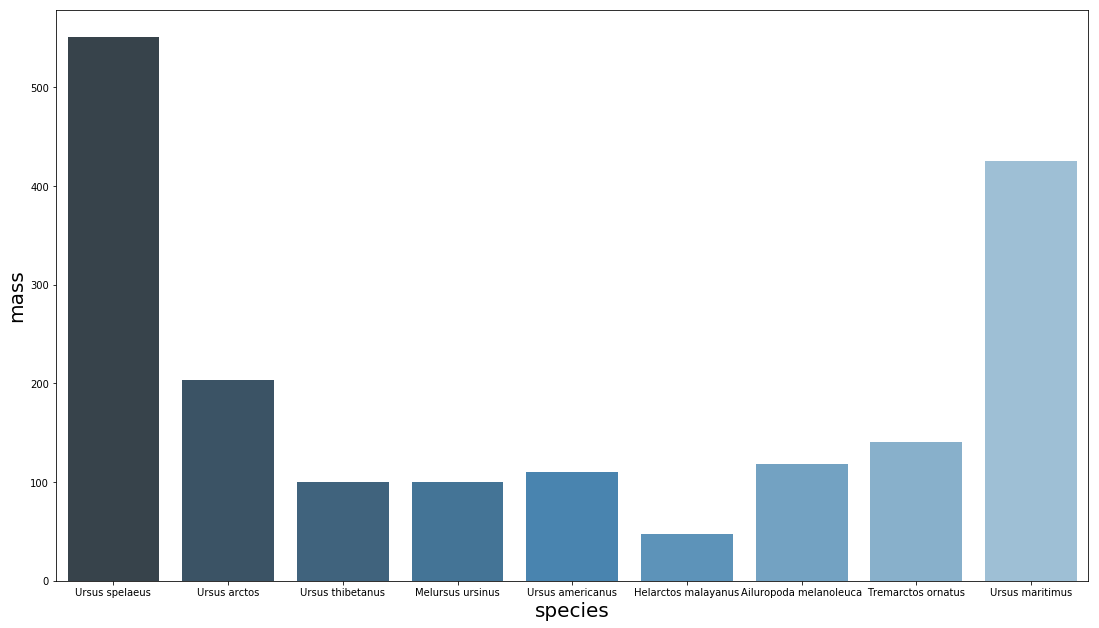

In [11]:
### 8
### Bar plot of species (x) and mass (y) using seaborn
### Citation: https://seaborn.pydata.org/generated/seaborn.barplot.html

ax= sns.barplot (x= "species", y= "mass", palette="Blues_d", data= bears_df_cols)
ax.figure.set_size_inches(18.5, 10.5) #plot size dimensions
ax.set_xlabel('species', fontsize=20) #x aaxis label and font
ax.set_ylabel('mass', fontsize=20) #y axis label and font

1. Ursus spelaeus is the largest bear species 
2. The species is extinct

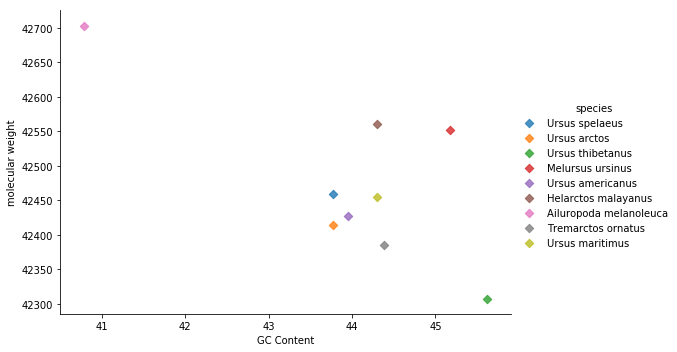

In [12]:
### 9
### Scatterplot of GC Content (x) and molecular weight (y) with the markers colored according to species

ay= sns.lmplot(x= "GC Content", y= "molecular weight", data= bears_df_cols, hue="species", markers='D', fit_reg=False, aspect=1.5)

In [13]:
### 10
### Saving the dataframe with changes
### Citation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html

bears_df_cols.to_csv('bears_updated_info.csv')


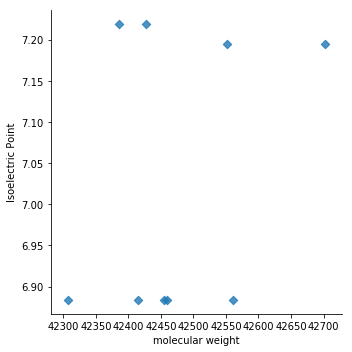

In [14]:
### 11
### Bonus plot of isoelectric point of amino acid sequence (y) and its molecular weight (x)

az= sns.lmplot(x= "molecular weight", y= "Isoelectric Point", data= bears_df_cols, markers='D', fit_reg=False, aspect=1.0)